# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MEMANGGIL DATASET

In [2]:
df = pd.read_csv('Stores.csv')

# Business Understanding



Pada tahapan ini kita membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun. Supermarket adalah toko swalayan yang menawarkan berbagai macam makanan, minuman, dan produk rumah tangga, yang diatur dalam beberapa bagian. Jenis toko ini lebih besar dan memiliki pilihan yang lebih luas daripada toko kelontong sebelumnya, tetapi lebih kecil dan jangkauan barang dagangannya lebih terbatas daripada hypermarket atau pasar kotak besar. Namun, dalam penggunaan sehari-hari di A.S., "toko kelontong" identik dengan supermarket, dan tidak digunakan untuk merujuk ke jenis toko lain yang menjual bahan makanan.
https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

# DATA UNDERSTANDING

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Dari data yang telah diambil mengenai transaksi cabang supermarket yang ada di Amerika, terdapat 5 kolom yang berisi 5 kolom float
1. Store_ID: (Indeks)ID dari toko tertentu. = float

2. Store_Area: Area Fisik toko di halaman persegi. = float

3. Items_Available: Jumlah item berbeda yang tersedia di toko terkait. = float

4. Daily_Customer_Count: Rata-rata jumlah pelanggan yang berkunjung ke toko selama sebulan. = float

5. Store_Sales: Penjualan dalam (US $) yang dibuat toko. = float

In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


<Axes: >

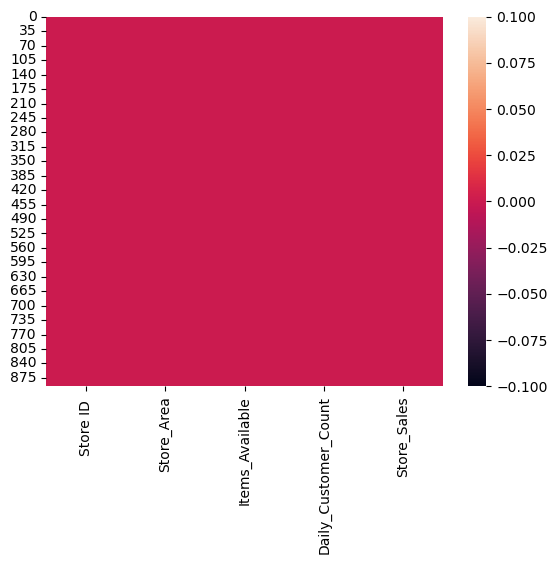

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


# Visualisasi Data

<Axes: >

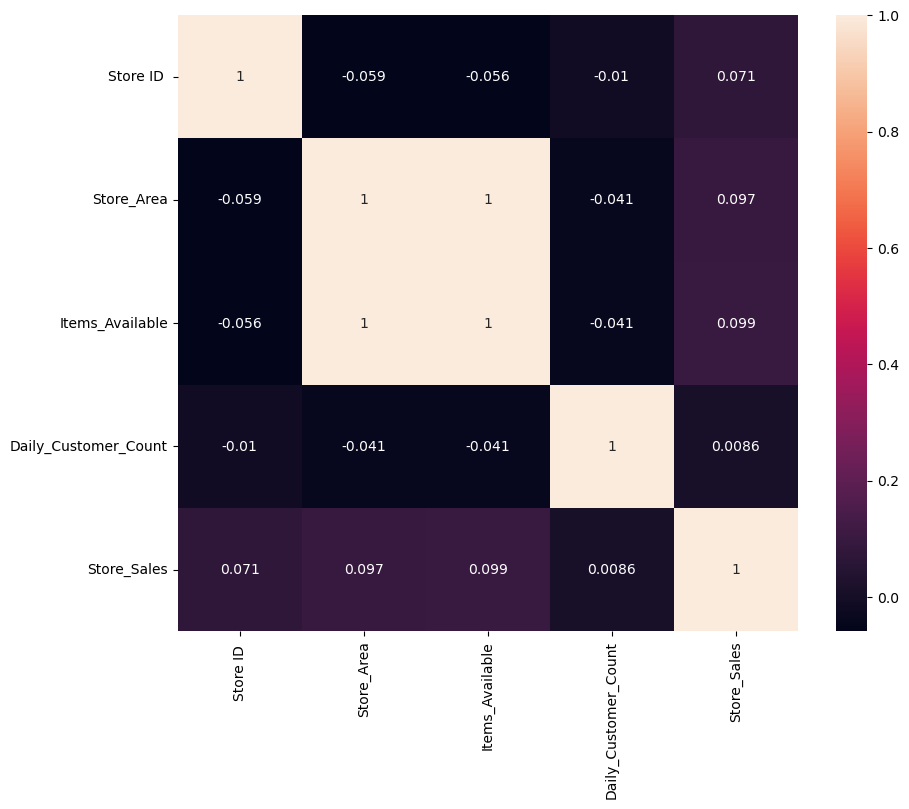

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Store Area berdasarkan Daily Customer Count

In [8]:
models = df.groupby('Daily_Customer_Count').count()[['Items_Available']].sort_values(by='Items_Available',ascending=True).reset_index()
models = models.rename(columns={'Items_Available':'Store_Area'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 [Text(0, 0, '10'),
  Text(1, 0, '70'),
  Text(2, 0, '100'),
  Text(3, 0, '120'),
  Text(4, 0, '130'),
  Text(5, 0, '140'),
  Text(6, 0, '160'),
  Text(7, 0, '190'),
  Text(8, 0, '210'),
  Text(9, 0, '220'),
  Text(10, 0, '230'),
  Text(11, 0, '280'),
  Text(12, 0, '2

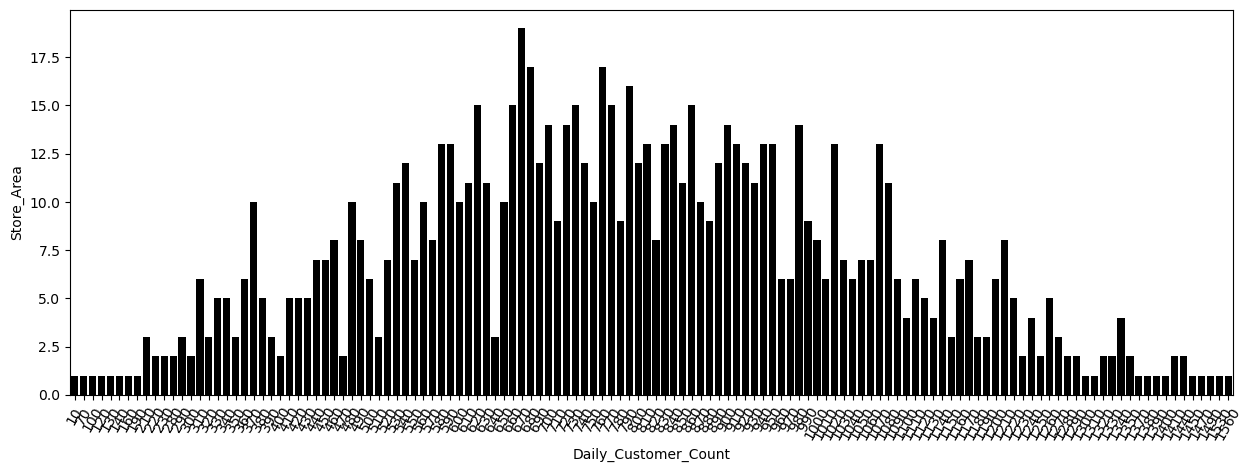

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Daily_Customer_Count'], y=models['Store_Area'], color='black')
plt.xticks(rotation=60)

# seleksi fitur

In [10]:
features = ['Store_Sales','Daily_Customer_Count','Items_Available']
x = df[features]
y = df['Store_Area']
x.shape, y.shape

((896, 3), (896,))

# split data training dan data testing

In [11]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(224,)

# membuat model regresi linier

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [13]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9980883807853458


# membuat inputan model regresi linier

In [14]:
# Store_Sales = Daily_Customer_Count = , Items_Available = 
input_data = np.array([[72240,1130,2111]])

prediction = lr.predict(input_data)
print('Estimasi Jumlah Store Area di Tiap Supermarket :', prediction)

Estimasi Jumlah Store Area di Tiap Supermarket : [1759.01349978]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [15]:
import pickle

filename = 'Estimasi_Store.sav'
pickle.dump(lr,open(filename,'wb'))